In [1]:
!wget https://www.larvalabs.com/public/images/cryptopunks/punks.png

--2021-01-17 11:07:59--  https://www.larvalabs.com/public/images/cryptopunks/punks.png
Resolving www.larvalabs.com (www.larvalabs.com)... 172.67.190.245, 104.21.60.26, 2606:4700:3037::ac43:bef5, ...
Connecting to www.larvalabs.com (www.larvalabs.com)|172.67.190.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 848174 (828K) [image/png]
Saving to: ‘punks.png.1’

punks.png.1         100%[===================>] 828.29K  --.-KB/s    in 0.07s   

2021-01-17 11:07:59 (11.1 MB/s) - ‘punks.png.1’ saved [848174/848174]



In [2]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt


In [3]:
def overlay_transparent(background_img, img_to_overlay_t, x, y, overlay_size=None):
    """
    @brief      Overlays a transparant PNG onto another image using CV2
    
    @param      background_img    The background image
    @param      img_to_overlay_t  The transparent image to overlay (has alpha channel)
    @param      x                 x location to place the top-left corner of our overlay
    @param      y                 y location to place the top-left corner of our overlay
    @param      overlay_size      The size to scale our overlay to (tuple), no scaling if None
    
    @return     Background image with overlay on top
    """
    
    bg_img = background_img.copy()
    
    if overlay_size is not None:
        img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

    # Extract the alpha mask of the RGBA image, convert to RGB 
    b,g,r,a = cv2.split(img_to_overlay_t)
    overlay_color = cv2.merge((b,g,r))
 
    # Blend
    mask = cv2.medianBlur(a,1)
    
    h, w, _ = overlay_color.shape
    roi = bg_img[y:y+h, x:x+w]

    # Black-out the area behind the logo in our original ROI
    img1_bg = cv2.bitwise_and(roi.copy(),roi.copy(),mask = cv2.bitwise_not(mask))
    
    # Mask out the logo from the logo image.
    img2_fg = cv2.bitwise_and(overlay_color,overlay_color,mask = mask)

    # Update the original image with our new ROI
    bg_img[y:y+h, x:x+w] = cv2.add(img1_bg, img2_fg)

    return bg_img


In [4]:

def cp_index(index):
    x = index % 100 *24
    #print(x)
    y = index // 100 *24
    #print(y)
    return x,y

def get_cp_by_index(index, width=24, height=24):
    x,y = cp_index(index)
    #print(x,y)
    xpos = x 
    ypos = y 
    img = all_img[ypos:ypos+width,xpos:xpos+height]
    return img

def cp_backg(img, color=None, x=24,y=24):
    colors = {}
    colors['blue'] = [95,133,149]
    colors['purple'] = [145,11,179]
    colors['green'] = [92,166,116]
    colors['brown'] = [154,85,80]
    background = np.arange(y*x*3, dtype='uint8').reshape(y,x,3)
    if color is not None:
        background[:] = colors.get(color)
    else:
        background[:] = random.choice(list(colors.values()))
    #print('background ', background.shape)
    img = overlay_transparent(background, img, 0, 0,(x,y))
    return img

def write_cp(index):
    img = get_cp_by_index(index)
    folder = 'images/original/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    cv2.imwrite(folder + "crypto_punk-{:05d}.png".format(i), img)
    folder = 'images/256/'
    if not os.path.exists(folder):
        os.makedirs(folder)
    img_256 = cv2.resize(img,(256,256), interpolation = cv2.INTER_NEAREST)
    cv2.imwrite(folder + "crypto_punk-256-{:05d}.png".format(i), img_256)
    #img_512 = cv2.resize(img,(512,512), interpolation = cv2.INTER_NEAREST)
    #cv2.imwrite("images/512/crypto_punk-512-{:05d}.png".format(i), img_512)

In [5]:
img_name = 'punks.png'
all_img = cv2.imread(img_name, cv2.IMREAD_UNCHANGED)
print(all_img.shape)

(2400, 2400, 4)


In [6]:
n = 10000
# use 10000 for all
n = 100

for i in range(n):
    write_cp(i)

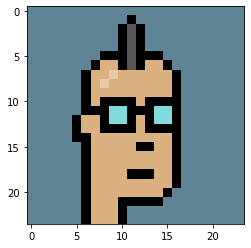

In [7]:
index = 1532

img = get_cp_by_index(index)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
img = cp_backg(img, 'blue')

plt.imshow(img)

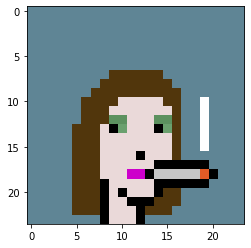

In [8]:
index = 6057

img = get_cp_by_index(index)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
img = cp_backg(img)

plt.imshow(img)


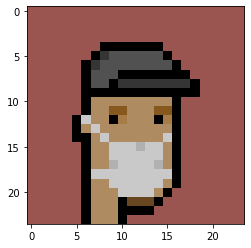

In [9]:
index = 3120

img = get_cp_by_index(index)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
img = cp_backg(img)

plt.imshow(img)

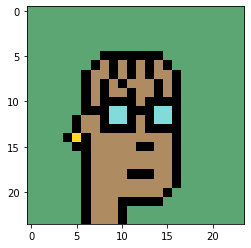

In [10]:
index = int(random.random() * 10000)

img = get_cp_by_index(index)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
img = cp_backg(img)

plt.imshow(img)